In [3]:
import lightgbm as lgb

In [2]:
!pip install lightgbm

In [59]:
!pip install feature_selector

In [156]:
import pandas as pd
import numpy as np

In [157]:
import os

In [158]:
from feature_selector import FeatureSelector

In [159]:
# Features are in train and labels are in train_labels
train = pd.read_csv("bank_data.csv")


In [160]:
train.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'target'],
      dtype='object')

In [161]:
train["target"] = train["target"].replace({'No':0, 'Yes':1})

In [162]:
#Removing the duplicate rows
train = train.drop_duplicates(subset = None, keep='first',inplace=False)

In [163]:
train.shape

(20486, 65)

In [164]:
train_labels = train['target']

In [165]:
train.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.036348,0.29370,0.22999,1.95800,49.611,0.323820,0.044336,2.17300,1.0571,0.63820,...,0.054040,0.056955,0.94596,0.084022,4.5846,2.1621,128.140,2.8484,1.2904,0
1,0.032515,0.25971,0.40845,2.57270,-6.682,-0.000148,0.040253,2.85050,2.1327,0.74029,...,0.000329,0.043921,0.98201,0.000000,4.7734,10.3800,44.448,8.2118,6.4267,0
2,0.019116,0.55685,-0.20328,0.56593,-59.719,0.000000,0.019116,0.79581,2.0933,0.44315,...,0.016719,0.043137,0.99131,0.110710,16.4970,15.4440,81.660,4.4698,2.8481,0
3,-0.173850,0.28684,0.20102,1.73250,356.930,0.000000,-0.173850,2.48630,3.0166,0.71316,...,0.178720,-0.243780,0.82306,0.000000,30.1680,51.1950,33.206,10.9920,5.7509,0
4,0.410710,0.14770,0.78015,6.28190,271.120,0.000000,0.534880,5.77040,1.6009,0.85230,...,0.326340,0.481890,0.66935,0.000000,NaN,5.0324,33.676,10.8390,22.1870,0


In [166]:
train = train.drop(columns = ['target'])

In [167]:
train.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.036348,0.29370,0.22999,1.95800,49.611,0.323820,0.044336,2.17300,1.0571,0.63820,...,8667.800,0.054040,0.056955,0.94596,0.084022,4.5846,2.1621,128.140,2.8484,1.2904
1,0.032515,0.25971,0.40845,2.57270,-6.682,-0.000148,0.040253,2.85050,2.1327,0.74029,...,442.920,0.000329,0.043921,0.98201,0.000000,4.7734,10.3800,44.448,8.2118,6.4267
2,0.019116,0.55685,-0.20328,0.56593,-59.719,0.000000,0.019116,0.79581,2.0933,0.44315,...,-4488.700,0.016719,0.043137,0.99131,0.110710,16.4970,15.4440,81.660,4.4698,2.8481
3,-0.173850,0.28684,0.20102,1.73250,356.930,0.000000,-0.173850,2.48630,3.0166,0.71316,...,52.284,0.178720,-0.243780,0.82306,0.000000,30.1680,51.1950,33.206,10.9920,5.7509
4,0.410710,0.14770,0.78015,6.28190,271.120,0.000000,0.534880,5.77040,1.6009,0.85230,...,676.810,0.326340,0.481890,0.66935,0.000000,NaN,5.0324,33.676,10.8390,22.1870


In [168]:
#Implementation
#The FeatureSelector has five functions for identifying columns to remove:

#identify_missing
#identify_single_unique
#identify_collinear
#identify_zero_importance
#identify_low_importance

fs = FeatureSelector(data = train, labels = train_labels)

In [267]:
#Missing Values
fs.identify_missing(missing_threshold=0.6)

1 features with greater than 0.40 missing values.



In [170]:
missing_features = fs.ops['missing']
missing_features[:10]

[]

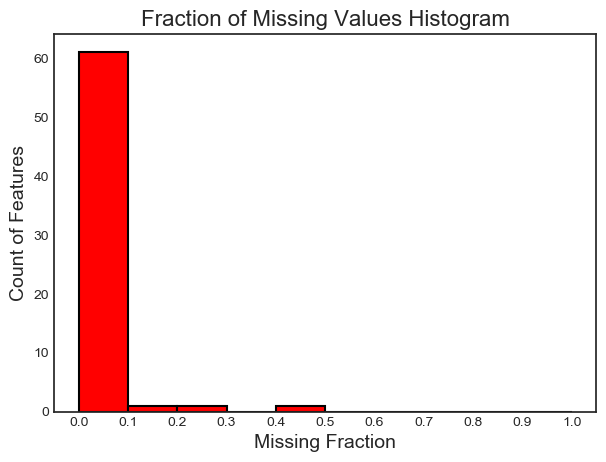

In [171]:
fs.plot_missing()

In [172]:
fs.missing_stats.head(12)

,missing_fraction
Attr37,0.464366
Attr21,0.234453
Attr27,0.122962
Attr45,0.075369
Attr60,0.075369
Attr11,0.044323
Attr53,0.022064
Attr64,0.022064
Attr54,0.022064
Attr28,0.022064


In [173]:
#Finding Single Unique value
fs.identify_single_unique()

0 features with a single unique value.



In [270]:
#Collinear (highly correlated) Features
fs.identify_collinear(correlation_threshold=0.99)

17 features with a correlation magnitude greater than 0.99.



In [175]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['Attr3', 'Attr14', 'Attr17', 'Attr23', 'Attr26']

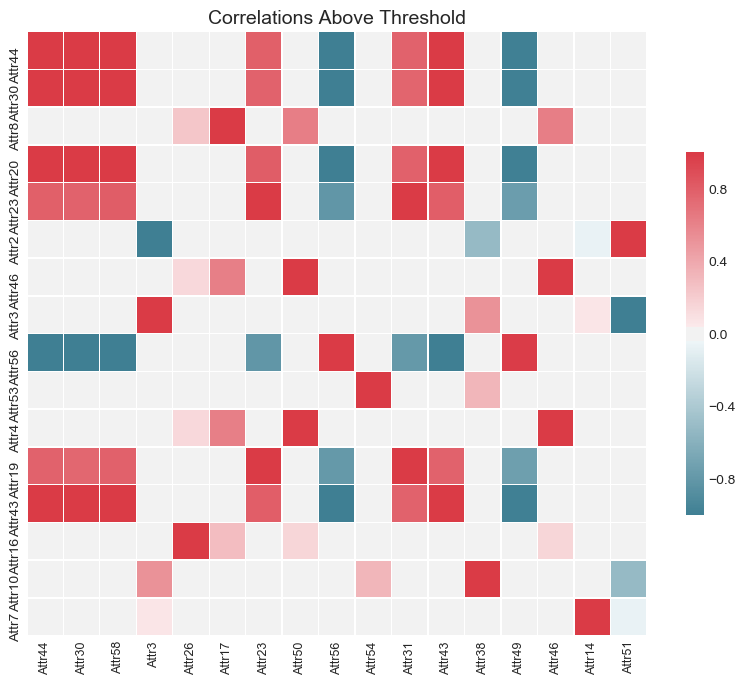

In [176]:
fs.plot_collinear()

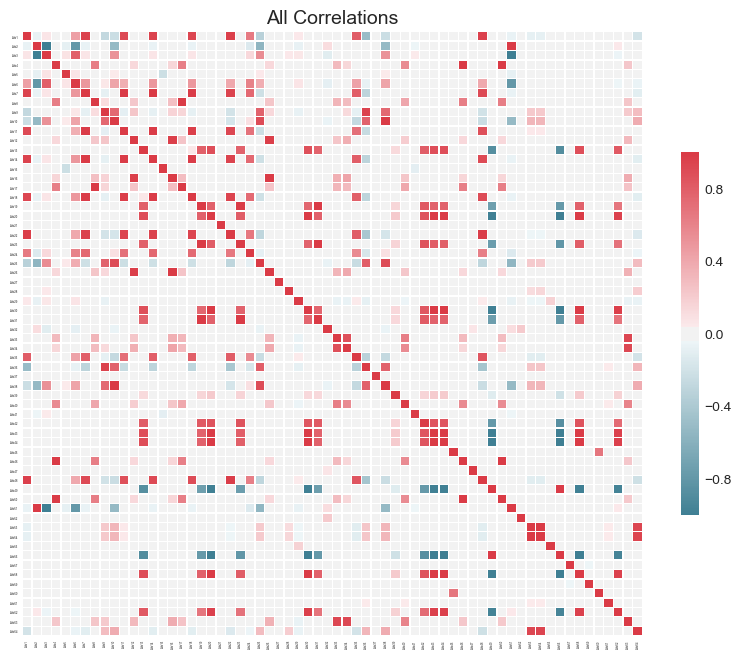

In [177]:
fs.plot_collinear(plot_all=True)

20 features with a correlation magnitude greater than 0.98.



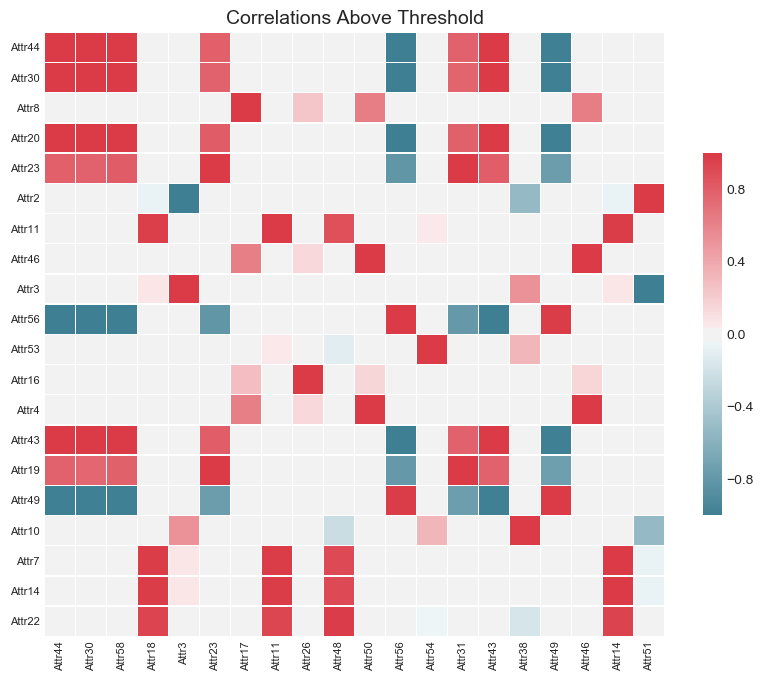

In [178]:
fs.identify_collinear(correlation_threshold=0.98)
fs.plot_collinear()

In [179]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,Attr3,Attr2,-0.996360
1,Attr11,Attr7,0.987910
2,Attr14,Attr7,1.000000
3,Attr14,Attr11,0.987910
4,Attr17,Attr8,0.998026
5,Attr18,Attr7,0.989604
6,Attr18,Attr14,0.989645
7,Attr23,Attr19,0.997336
8,Attr26,Attr16,0.995857
9,Attr30,Attr20,0.993833


In [180]:
#Identifying the Zero Importance Feature
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[492]	valid_0's auc: 0.986063	valid_0's binary_logloss: 0.11389
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[440]	valid_0's auc: 0.986436	valid_0's binary_logloss: 0.111468
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[541]	valid_0's auc: 0.988123	valid_0's binary_logloss: 0.101109
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[479]	valid_0's auc: 0.986121	valid_0's binary_logloss: 0.108022
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[436]	valid_0's auc: 0.988686	valid_0's binary_logloss: 0.106238
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[455]	valid_0's auc: 0.987688	valid_0's binary_logloss

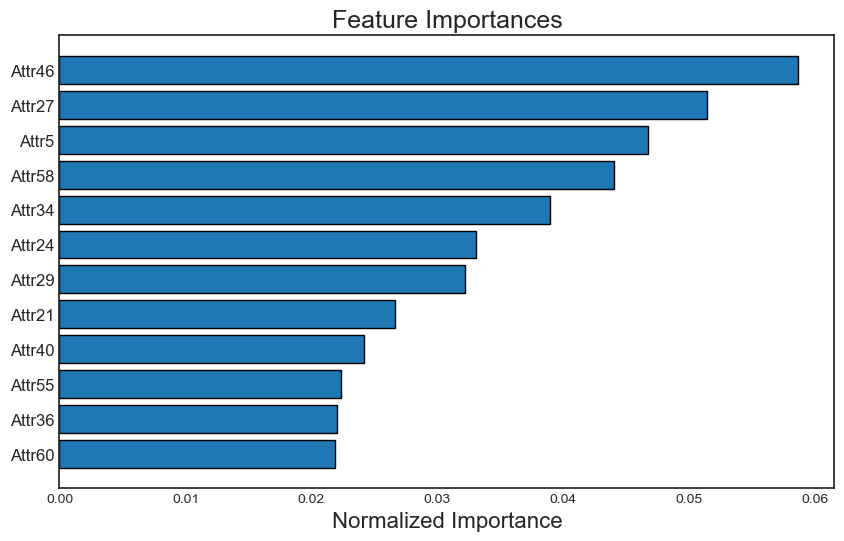

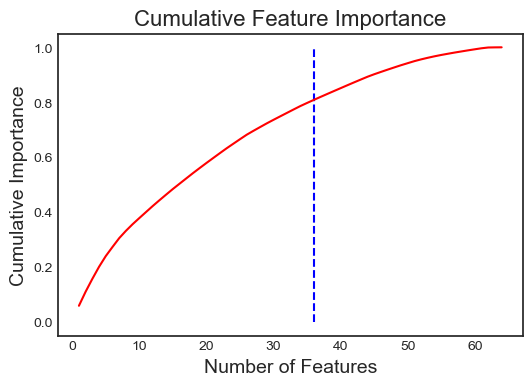

36 features required for 0.80 of cumulative importance


In [181]:
fs.plot_feature_importances(threshold = 0.80, plot_n = 12)

In [182]:
fs.feature_importances.head(15)

,feature,importance,normalized_importance,cumulative_importance
0,Attr46,846.9,0.058593,0.058593
1,Attr27,742.6,0.051377,0.109970
2,Attr5,674.7,0.046679,0.156649
3,Attr58,635.8,0.043988,0.200637
4,Attr34,562.8,0.038937,0.239574
5,Attr24,478.3,0.033091,0.272665
6,Attr29,465.1,0.032178,0.304843
7,Attr21,385.0,0.026636,0.331479
8,Attr40,349.8,0.024201,0.355680
9,Attr55,323.0,0.022347,0.378027


In [183]:
fs.identify_low_importance(cumulative_importance = 0.99)

59 features required for cumulative importance of 0.99 after one hot encoding.
5 features do not contribute to cumulative importance of 0.99.



In [184]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['Attr7', 'Attr17', 'Attr2', 'Attr18', 'Attr14']

In [185]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 0 features.


In [186]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 0 features.


In [187]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 22 features including one-hot features.


In [188]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 64
Final Number of Features:  42


In [189]:
fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.99, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

17 features with a correlation magnitude greater than 0.99.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[368]	valid_0's auc: 0.988823	valid_0's binary_logloss: 0.0979601
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[415]	valid_0's auc: 0.985661	valid_0's binary_logloss: 0.122936
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[515]	valid_0's auc: 0.990003	valid_0's binary_logloss: 0.0988342
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[438]	valid_0's auc: 0.987866	valid_0's binary_logloss: 0.103834
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[413]	valid_0's auc: 0.988355	valid_0's binary_logloss: 0.0983

In [190]:
train.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64'],
      dtype='object')

In [191]:
train_removed_all.columns

Index(['Attr1', 'Attr4', 'Attr5', 'Attr6', 'Attr8', 'Attr9', 'Attr10',
       'Attr12', 'Attr13', 'Attr15', 'Attr16', 'Attr19', 'Attr20', 'Attr21',
       'Attr22', 'Attr24', 'Attr25', 'Attr27', 'Attr28', 'Attr29', 'Attr32',
       'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr39', 'Attr40',
       'Attr41', 'Attr42', 'Attr45', 'Attr47', 'Attr52', 'Attr53', 'Attr55',
       'Attr57', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64'],
      dtype='object')

In [192]:
bank_data_fs = train_removed_all

In [193]:
bank_data_fs.columns

Index(['Attr1', 'Attr4', 'Attr5', 'Attr6', 'Attr8', 'Attr9', 'Attr10',
       'Attr12', 'Attr13', 'Attr15', 'Attr16', 'Attr19', 'Attr20', 'Attr21',
       'Attr22', 'Attr24', 'Attr25', 'Attr27', 'Attr28', 'Attr29', 'Attr32',
       'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr39', 'Attr40',
       'Attr41', 'Attr42', 'Attr45', 'Attr47', 'Attr52', 'Attr53', 'Attr55',
       'Attr57', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64'],
      dtype='object')

In [194]:
type(bank_data_fs)

pandas.core.frame.DataFrame

In [195]:
type(train_labels)

pandas.core.series.Series

In [196]:
train_labels.value_counts()

0    16322
1     4164
Name: target, dtype: int64

In [143]:
bank_data_fs.shape

(20486, 42)

In [209]:
#Mean Imputation
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy="mean")



C:\Users\Gnanendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [210]:
bank_data_fs_imputed = bank_data_fs.copy()


In [211]:
bank_data_fs_imputed.shape

(20486, 42)

In [214]:
bank_data_fs_imputed.iloc[:,0:42] = mean_imputer.fit_transform(bank_data_fs_imputed.iloc[:,0:42])

In [215]:
bank_data_fs_imputed.head()

,Attr1,Attr4,Attr5,Attr6,Attr8,Attr9,Attr10,Attr12,Attr13,Attr15,...,Attr52,Attr53,Attr55,Attr57,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.036348,1.95800,49.611,0.323820,2.17300,1.0571,0.63820,0.184670,0.186780,839.310,...,0.37113,1.20430,8667.800,0.056955,0.084022,4.58460,2.1621,128.140,2.8484,1.2904
1,0.032515,2.57270,-6.682,-0.000148,2.85050,2.1327,0.74029,0.154990,0.050150,886.300,...,0.12182,2.23090,442.920,0.043921,0.000000,4.77340,10.3800,44.448,8.2118,6.4267
2,0.019116,0.56593,-59.719,0.000000,0.79581,2.0933,0.44315,0.040819,0.035765,2714.900,...,0.22753,0.60295,-4488.700,0.043137,0.110710,16.49700,15.4440,81.660,4.4698,2.8481
3,-0.173850,1.73250,356.930,0.000000,2.48630,3.0166,0.71316,-0.633490,-0.057632,-602.200,...,0.11058,1.35960,52.284,-0.243780,0.000000,30.16800,51.1950,33.206,10.9920,5.7509
4,0.410710,6.28190,271.120,0.000000,5.77040,1.6009,0.85230,3.621400,0.360700,93.363,...,0.13696,11.81200,676.810,0.481890,0.000000,412.62703,5.0324,33.676,10.8390,22.1870


In [216]:
#Scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [218]:
## Split the data into X and y
X2 = bank_data_fs_imputed
y2 = train_labels

In [227]:
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state = 123)

In [228]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(16388, 42)
(4098, 42)
(16388,)
(4098,)


In [229]:
## Scale the numeric attributes
scaler = StandardScaler()
scaler.fit(X2_train.iloc[:,0:42])

X2_train.iloc[:,0:42] = scaler.transform(X2_train.iloc[:,0:42])
X2_test.iloc[:,0:42] = scaler.transform(X2_test.iloc[:,0:42])

C:\Users\Gnanendra\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Gnanendra\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Gnanendra\Anaconda3\lib\site-

In [230]:
print(X2_train.head())
print(X2_test.head())
print(y2_train.head())
print(y2_test.head())

          Attr1     Attr4     Attr5     Attr6     Attr8     Attr9    Attr10  \
23857  0.029813 -0.019517  0.005606  0.034434 -0.028276 -0.055259 -0.015191   
16704  0.023010 -0.023568  0.004765  0.028675 -0.028892 -0.044691 -0.012178   
9732  -0.008835 -0.025572 -0.005305 -0.045431 -0.028259 -0.079854 -0.006205   
23740  0.001281 -0.021880  0.005543  0.018945 -0.029503 -0.056047 -0.019283   
583    0.002678 -0.019246  0.003141  0.021602 -0.024714 -0.088307  0.011701   

         Attr12    Attr13    Attr15    ...       Attr52    Attr53    Attr55  \
23857  0.003619 -0.012818 -0.012348    ...    -0.009081 -0.024094  0.214022   
16704  0.002239 -0.012495 -0.018169    ...    -0.008888 -0.024390 -0.099899   
9732  -0.004240 -0.013517  0.229700    ...    -0.007931 -0.024241 -0.209204   
23740 -0.003154 -0.013393 -0.116404    ...    -0.008800 -0.024391 -0.037261   
583   -0.002817 -0.012536 -0.010103    ...    -0.008829 -0.023833  0.260769   

         Attr57    Attr59    Attr60    Attr61    A

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [232]:
#Building the Logistic Regression
from sklearn.metrics import accuracy_score
logistic2 = LogisticRegression()
logistic2.fit(X2_train, y2_train)
y_pred_train_logistic2 = logistic2.predict(X2_train)
y_pred_test_logistic2 = logistic2.predict(X2_test)
print("Train FS Logistic Accuracy :",accuracy_score(y_true=y2_train,y_pred=y_pred_train_logistic2))
print("Test FS Logistic Accuracy :",accuracy_score(y_true=y2_test,y_pred=y_pred_test_logistic2))

C:\Users\Gnanendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train FS Logistic Accuracy : 0.7982060043934587
Test FS Logistic Accuracy : 0.7884333821376281


In [234]:
## Building the Support Vector Machine Classifier
from sklearn.svm import SVC
SVC2 = SVC()
SVC2.fit(X2_train, y2_train)
y_pred_train_svc2 = SVC2.predict(X2_train)
y_pred_test_svc2 = SVC2.predict(X2_test)

print("Train FS SVC Accuracy:",accuracy_score(y_true=y2_train,y_pred=y_pred_train_svc2))
print("Test FS SVC Accuracy:",accuracy_score(y_true=y2_test,y_pred=y_pred_test_svc2))

Train FS SVC Accuracy: 0.8007078350012204
Test FS SVC Accuracy: 0.7894094680331869


In [238]:
#Building the Decision Tree Model
dtc2 = DecisionTreeClassifier(max_depth=10)
dtc2.fit(X2_train,y2_train)
y_pred_train_dtc2 = dtc2.predict(X2_train)
y_pred_test_dtc2 = dtc2.predict(X2_test)

print("Train FS Decision Tree Accuracy:",accuracy_score(y_true=y2_train,y_pred=y_pred_train_dtc2))
print("Test FS Decision Tree Accuracy:",accuracy_score(y_true=y2_test,y_pred=y_pred_test_dtc2))

Train FS Decision Tree Accuracy: 0.9449597266292409
Test FS Decision Tree Accuracy: 0.9062957540263543


In [239]:
## Budimg the model with KNN

from sklearn.neighbors import KNeighborsClassifier

KNN2 = KNeighborsClassifier(n_neighbors=5) # default value for n_neighbors is 5
KNN2.fit(X2_train,y2_train)
y_pred_train_KNN2 = KNN2.predict(X2_train)
y_pred_test_KNN2 = KNN2.predict(X2_test)

print("Train FS KNN Accuracy:",accuracy_score(y_true=y2_train,y_pred=y_pred_train_KNN2))
print("Test FS KNN Accuracy:",accuracy_score(y_true=y2_test,y_pred=y_pred_test_KNN2))

Train FS KNN Accuracy: 0.8898584329997559
Test FS KNN Accuracy: 0.8382137628111274


In [241]:
#Building the Random Forest model
from sklearn.ensemble import RandomForestClassifier
RFC2 = RandomForestClassifier()
RFC2.fit(X2_train, y2_train)
y_pred_train_RFC2 = RFC2.predict(X2_train)
y_pred_test_RFC2 = RFC2.predict(X2_test)
print("Train FS RFC Accuracy:",accuracy_score(y_true=y2_train,y_pred=y_pred_train_RFC2))
print("Test FS RFC Accuracy:",accuracy_score(y_true=y2_test,y_pred=y_pred_test_RFC2))

C:\Users\Gnanendra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train FS RFC Accuracy: 0.9916402245545521
Test FS RFC Accuracy: 0.9114202049780381


In [242]:
stack2 = pd.DataFrame([y_pred_test_logistic2,y_pred_test_svc2,y_pred_test_dtc2,y_pred_test_KNN2,y_pred_test_RFC2]).T

In [244]:
from scipy.stats import mode

In [245]:
stack2.columns = ['Logistic_FS','SVC_FS','DTC_FS','KNN_FS', 'RFC_FS']

In [246]:
stack2.head()

,Logistic_FS,SVC_FS,DTC_FS,KNN_FS,RFC_FS
0,0,0,1,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [249]:
stacked_pred2 = mode(stack2,axis=1)[0]
stacked_pred2

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [250]:
print("FS Decistion Trees accuracy", accuracy_score(y2_test,y_pred_test_dtc2))
print("FS Logistic Regression accuracy", accuracy_score(y2_test, y_pred_test_logistic2))
print("FS SVC accuracy", accuracy_score(y2_test, y_pred_test_svc2))
print("FS RFC Accuracy", accuracy_score(y2_test, y_pred_test_RFC2))
print("FS KNN Accuracy", accuracy_score(y2_test, y_pred_test_KNN2))
print("FS Stacked Accuracy: ", accuracy_score(y2_test,stacked_pred2))

FS Decistion Trees accuracy 0.9062957540263543
FS Logistic Regression accuracy 0.7884333821376281
FS SVC accuracy 0.7894094680331869
FS RFC Accuracy 0.9114202049780381
FS KNN Accuracy 0.8382137628111274
FS Stacked Accuracy:  0.8582235236700829


In [251]:
#Model Building using boosting
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#Creating AdaBoost Decision Tree classifier
from sklearn.ensemble import AdaBoostClassifier

In [261]:
FS_Adaboost_DTC = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 600,
    learning_rate = 1)

In [262]:
# Train model
%time FS_Adaboost_DTC.fit(X2_train, y2_train)

Wall time: 2min 27s


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=600, random_state=None)

In [263]:
#Test the model
y_preds_FS_adaboost = FS_Adaboost_DTC.predict(X2_test)

In [264]:
#Verify the accuracy
#Verify accuracy
from sklearn.metrics import accuracy_score
print("FS Test AdaBoost Accuracy:",accuracy_score(y_true=y2_test,y_pred=y_preds_FS_adaboost))

FS Test AdaBoost Accuracy: 0.9314299658369937


In [275]:
#AdaBoost Classifier Grid Search Validation
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [200, 400,600],
              'learning_rate' : [0.1, 0.5, 0.9]}

FS_Adaboost_GS = GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [276]:
# Train model
%time FS_Adaboost_GS.fit(X2_train, y2_train)

C:\Users\Gnanendra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 15min 9s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 400, 600], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [280]:
best_ada_model_FS = FS_Adaboost_GS.best_estimator_
print (FS_Adaboost_GS.best_score_, FS_Adaboost_GS.best_params_)

0.9297046619477667 {'learning_rate': 0.5, 'n_estimators': 400}


In [282]:
y_pred_test_FS_Ada = best_ada_model_FS.predict(X2_test)

In [283]:
# Verify accuracy
print(accuracy_score(y2_test,y_pred_test_FS_Ada))

0.931185944363104


In [284]:
#Build Gradient Boosting Classifier
#Create Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [285]:
FS_GBM = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

In [286]:
#Train Gradient Boosting Model
FS_GBM.fit(X2_train, y2_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [287]:
#Prediction on Test data
%time y_pred_FS_GBM = FS_GBM.predict(X2_test)

Wall time: 9.99 ms


In [288]:
#Accuracy
print(accuracy_score(y2_test,y_pred_FS_GBM))

0.9243533430941923


In [290]:
#Grid Search Cross validation
from sklearn.model_selection import GridSearchCV

# Model in use
GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150,200,250],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.5,0.9]}
 
FS_GBM_CV = GridSearchCV(estimator=GBM, param_grid=param_grid)

In [291]:
%time FS_GBM_CV.fit(X2_train, y2_train)

C:\Users\Gnanendra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 31min 1s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 150, 200, 250], 'max_depth': [5, 10], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [292]:
#Prediction on Test data
%time y_pred_FS_GBM_CV = FS_GBM_CV.predict(X2_test)

Wall time: 55 ms


In [293]:
#Accuracy
print(accuracy_score(y2_test,y_pred_FS_GBM_CV))

0.9314299658369937


In [294]:
best_FS_GBM_CV = FS_GBM_CV.best_estimator_
print (FS_GBM_CV.best_score_, FS_GBM_CV.best_params_)

0.9327556748840615 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}


In [295]:
#Prediction on Test Set
y_pred_test_FS_GBM_CV = best_FS_GBM_CV.predict(X2_test)

In [298]:
# Verify accuracy
print(accuracy_score(y2_test,y_pred_test_FS_GBM_CV))

0.9314299658369937


In [299]:
#Building XGBoost Classifier
from xgboost import XGBClassifier

In [300]:
# Defining the XGB model
FS_XGB = XGBClassifier()

In [301]:
# Traing the XGB classifier on train data set
%time FS_XGB.fit(X2_train, y2_train)

Wall time: 10.7 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [302]:
#XGB Preditions on Test Set

y_pred_FS_XGB = FS_XGB.predict(X2_test)

In [303]:
#XGB Model Preditction
print(accuracy_score(y2_test,y_pred_FS_XGB))

0.9238653001464129


In [304]:
#Grid Search cross validation on XGB Classifier
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 200],
     'max_depth': [10, 15, 20, 25]
}

 
FS_XGB_CV = GridSearchCV(estimator=XGB, param_grid=param_grid)

In [305]:
#Train Grid Search XGB Classifier
%time FS_XGB_CV.fit(X = X2_train, y=y2_train)

C:\Users\Gnanendra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 45min 26s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]), 'n_estimators': [100, 200], 'max_depth': [10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [306]:
# Find best model
best_FS_XGB_CV = FS_XGB_CV.best_estimator_
print (FS_XGB_CV.best_score_, FS_XGB_CV.best_params_)

0.9321454722968026 {'colsample_bytree': 0.6, 'max_depth': 10, 'n_estimators': 200}


In [307]:
#Prediction on Test Set
y_pred_test_FS_XGB_CV = best_FS_XGB_CV.predict(X2_test)

In [308]:
# Verify accuracy
print(accuracy_score(y2_test,y_pred_test_FS_XGB_CV))

0.9331381161542216
